<a href="https://colab.research.google.com/github/RonitT1234/Obesity_Research_Project/blob/main/RonitResearchProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question:"How well can a a a person’s obesity level be predicted based off their habits and physical condition using a KNN model (or other model maybe)?

> Add blockquote



Adding the CSV dataset:

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/RonitT1234/Obesity_Research_Project/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic.csv')


Overview of the dataset:

In [ ]:
df.head(100)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,26.0,1.70,70.0,yes,no,3.0,1.0,Frequently,no,2.0,no,2.0,0.0,Frequently,Public_Transportation,Normal_Weight
96,Female,23.0,1.66,60.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
97,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight


Checking for any missing data values with .info():

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Graphing Box plots of each variable to check for any extreme outliers:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

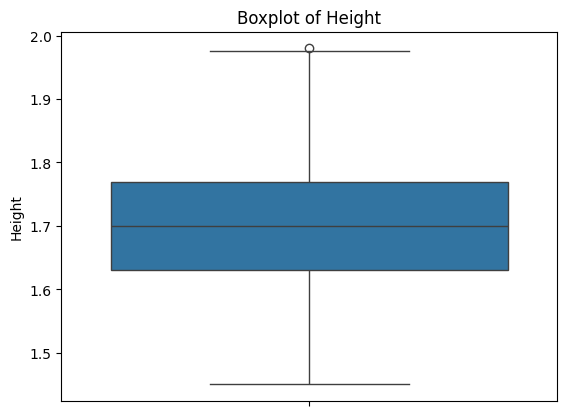

In [ ]:
column=2
sns.boxplot(y=df.iloc[:, column])
plt.ylabel(df.columns[column])
plt.title(f'Boxplot of {df.columns[column]}')
plt.show()

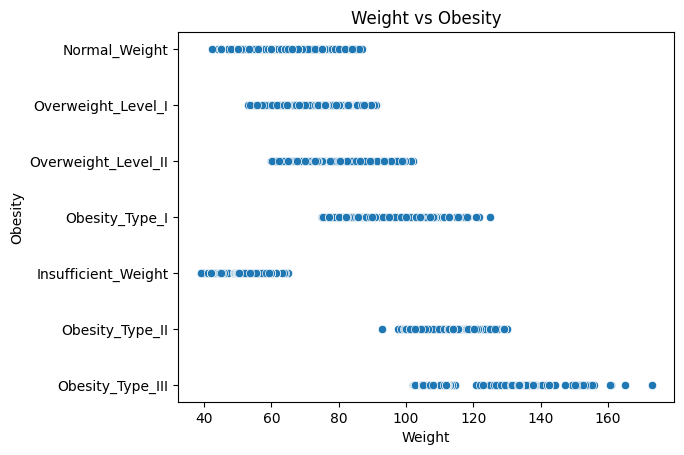

In [ ]:
sns.scatterplot(x='Weight', y='NObeyesdad', data=df)
plt.xlabel('Weight')
plt.ylabel('Obesity')
plt.title('Weight vs Obesity')
plt.show()

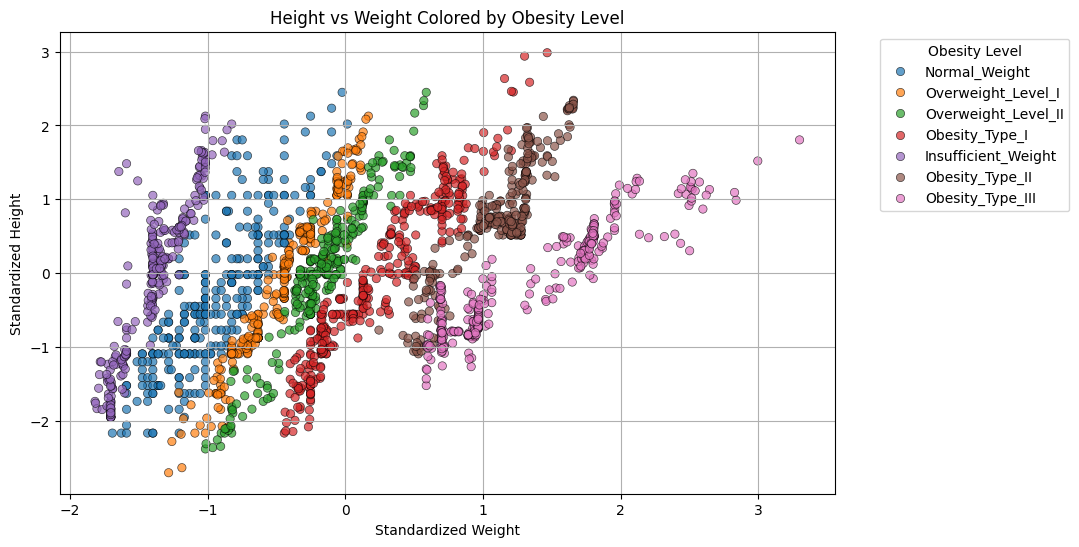

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize Weight and Height columns in df
scaler = StandardScaler()
df[['Weight', 'Height']] = scaler.fit_transform(df[['Weight', 'Height']])

# Plot directly from df
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight', y='Height', hue='NObeyesdad', palette='tab10', edgecolor='k', alpha=0.7)

plt.title("Height vs Weight Colored by Obesity Level")
plt.xlabel("Standardized Weight")
plt.ylabel("Standardized Height")
plt.legend(title="Obesity Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
#plt.tight_layout()
plt.show()

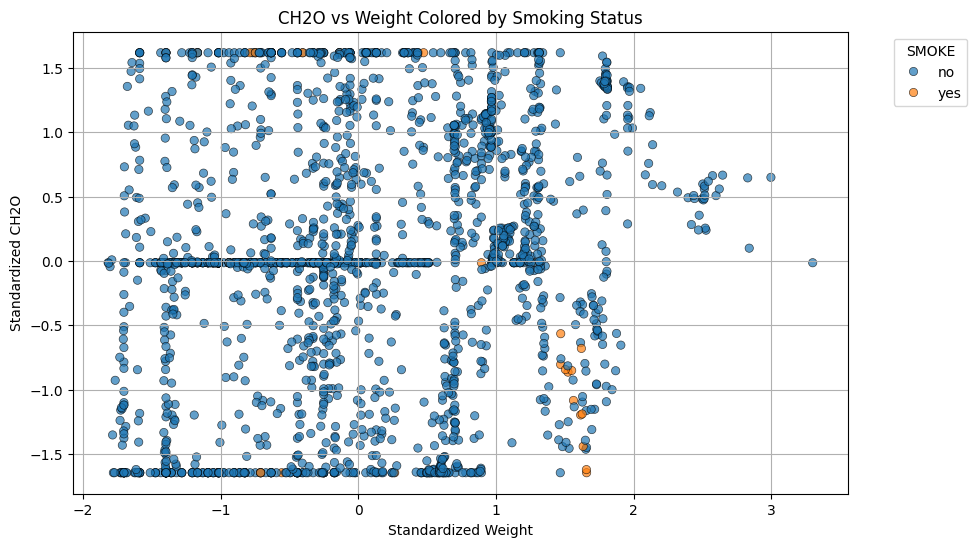

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize Weight and CH20 columns in df
scaler = StandardScaler()
df[['Weight', 'CH2O']] = scaler.fit_transform(df[['Weight', 'CH2O']])

# Plot CH20 vs Weight colored by SMOKE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight', y='CH2O', hue='SMOKE', palette='tab10', edgecolor='k', alpha=0.7)

plt.title("CH2O vs Weight Colored by Smoking Status")
plt.xlabel("Standardized Weight")
plt.ylabel("Standardized CH2O")
plt.legend(title="SMOKE", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()